# Stock Market Analysis Project

This project will analyze stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017. This project practices data analysis skills with matplotlib, pandas, and numpy. 

Part 0: Import
** Import the various libraries needed **

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix 
import datetime

## Part 1: Getting the Data

Tesla Stock (Ticker: TSLA on the NASDAQ)

** Use pandas_datareader to obtain the historical stock information for Tesla from Yahoo! finance from Jan 1, 2012 to Jan 1, 2017.**

In [4]:
start = datetime.datetime(2012, 1,1)
end = datetime.datetime(2017,1,1)
tesla = web.DataReader("TSLA", "yahoo", start, end)

In [5]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


Other Car Companies
** Repeat the same steps to grab data for Ford and GM (General Motors), **

In [6]:
ford = web.DataReader("F", "yahoo", start, end)
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.946151
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,8.067521
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.274564
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.360237
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.424490


In [7]:
gm = web.DataReader("GM", "yahoo", start, end)
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.640026
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.719082
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.525387
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,18.118261
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,18.055021


## Part 2: Visualizing the Data

** Create linear plot of all the stocks' Open price !**

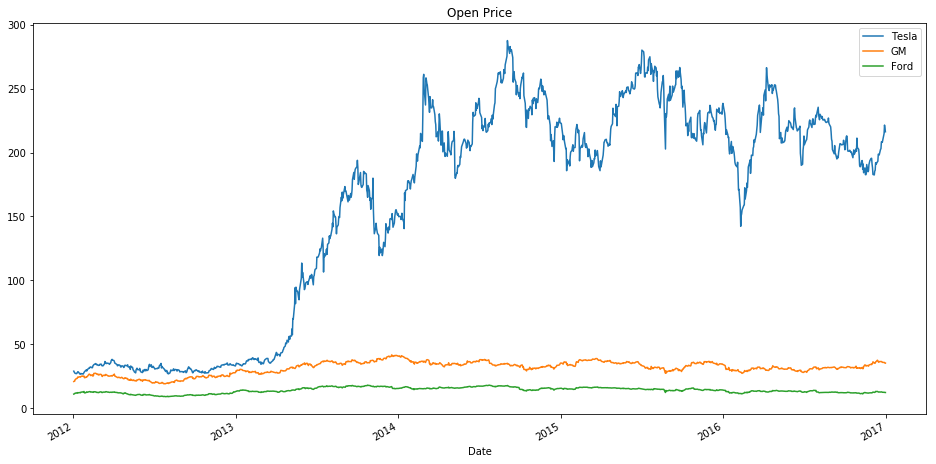

In [8]:
tesla["Open"].plot(figsize=(16,8), label = "Tesla")
gm["Open"].plot(figsize=(16,8), label = "GM")
ford["Open"].plot(figsize=(16,8), label = "Ford")
plt.title("Open Price")
plt.legend()

** Plot the Volume of stock traded each day.**

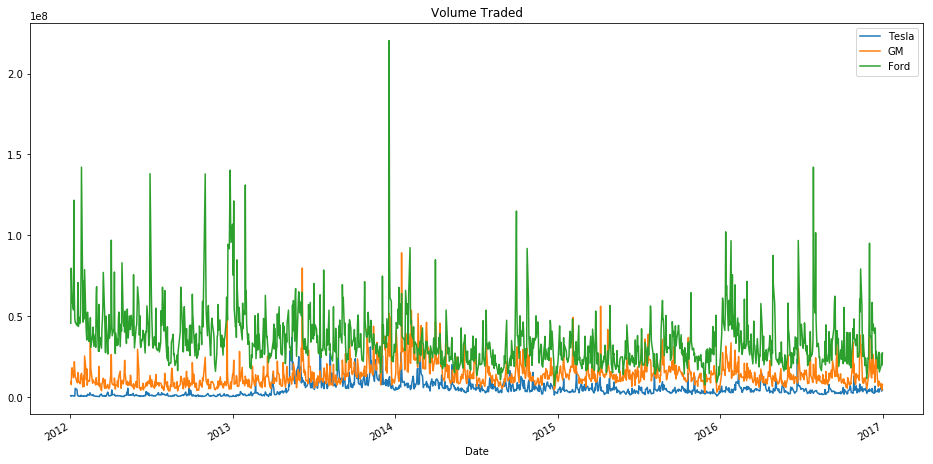

In [9]:
tesla["Volume"].plot(figsize=(16,8), label="Tesla")
gm["Volume"].plot(figsize=(16,8), label="GM")
ford["Volume"].plot(figsize=(16,8), label="Ford")
plt.title("Volume Traded")
plt.legend()

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

In [10]:
ford["Volume"].idxmax()

Timestamp('2013-12-18 00:00:00')

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Just a visual presentation**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [11]:
tesla["Total Traded"]=tesla["Open"]*tesla["Volume"]
ford["Total Traded"]=ford["Open"]*ford["Volume"]
gm["Total Traded"]=gm["Open"]*gm["Volume"]

** Plot this "Total Traded" against the time index.**

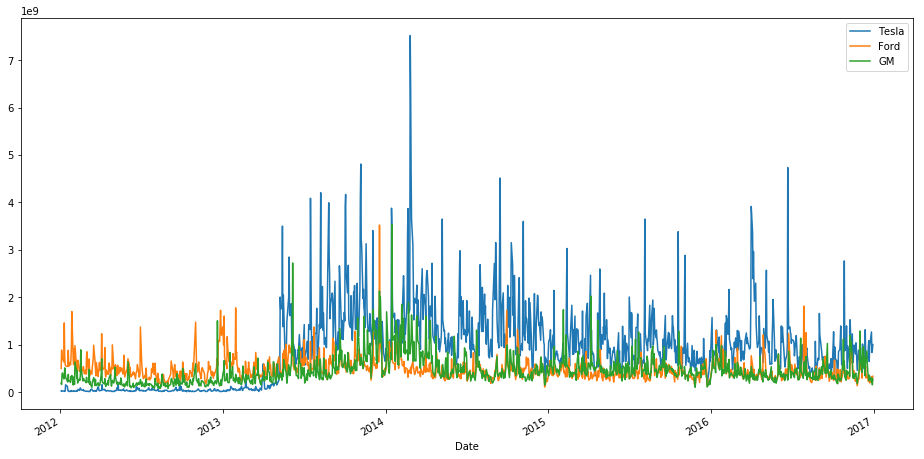

In [12]:
tesla["Total Traded"].plot(figsize=(16,8), label="Tesla")
ford["Total Traded"].plot(figsize=(16,8), label="Ford")
gm["Total Traded"].plot(figsize=(16,8), label="GM")
plt.legend()

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [13]:
tesla["Total Traded"].idxmax()

Timestamp('2014-02-25 00:00:00')

** On 2014.02-25 the stock has gained more than 30% since Tesla (TSLA) reported much stronger-than-expected profit and raised its sales targets the previous week. **

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

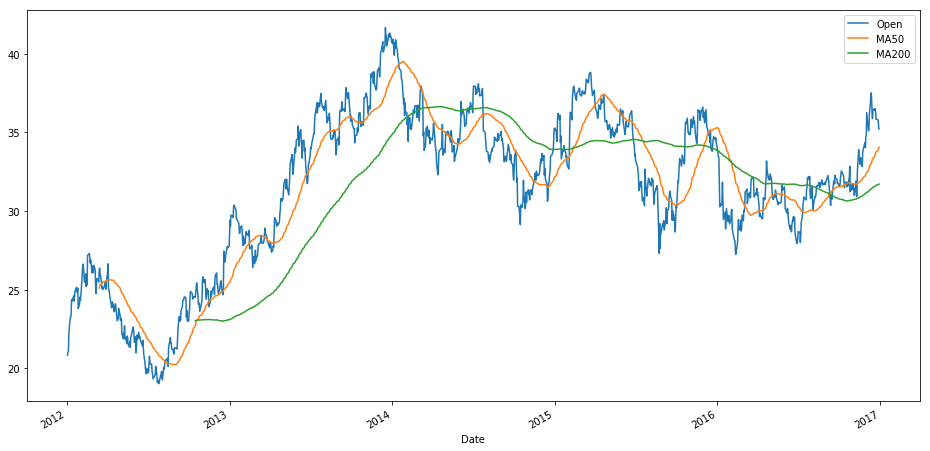

In [14]:
gm_MA50 = gm["Close"].rolling(50).mean()
gm_MA200 = gm["Close"].rolling(200).mean()
gm["Open"].plot(figsize=(16,8), label = "Open")
gm_MA50.plot(figsize=(16,8), label = "MA50")
gm_MA200.plot(figsize=(16,8), label = "MA200")
plt.legend()

** Find out if there is a relationship between these stocks, after all, they are all related to the car industry. Use a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. Rearrange the columns into a new single dataframe. **

In [15]:
df = pd.concat([tesla["Open"], gm["Open"], ford["Open"]], axis=1)
df.columns=["Tesla Open", "GM Open", "Ford Open"]
df.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.940001,20.830000,11.00
2012-01-04,28.209999,21.049999,11.15
2012-01-05,27.760000,21.100000,11.33
2012-01-06,27.200001,22.260000,11.74
2012-01-09,27.000000,23.200001,11.83


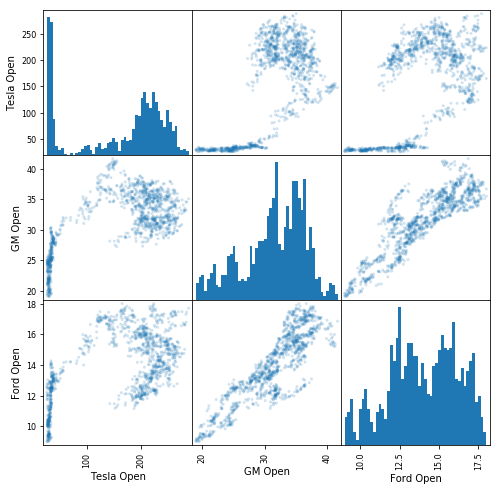

In [16]:
 scatter_matrix(df, alpha=0.2, figsize=(8,8), diagonal='hist', hist_kwds={"bins":50});

Part 3: Basic Financial Analysis
Now it is time to focus on a few key financial calculations. 

Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

r_t = (p[t] / p[t−1])−1

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [17]:
tesla["returns"] = (tesla["Close"]/tesla["Close"].shift(1))-1
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


In [18]:
ford["returns"] = (ford["Close"]/ford["Close"].shift(1))-1
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.946151,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,8.067521,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.274564,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.360237,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.424490,6.386011e+08,0.007686


In [19]:
gm["returns"] = (gm["Close"]/gm["Close"].shift(1))-1
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.640026,1.941627e+08,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.719082,1.653835e+08,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.525387,3.772807e+08,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,18.118261,4.059000e+08,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,18.055021,2.803604e+08,-0.003490


** Now plot a histogram of each companies returns. First show them separately**

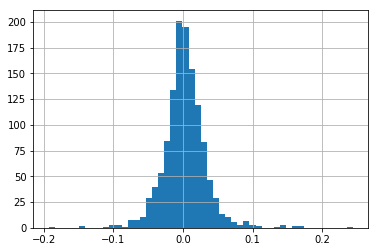

In [20]:
tesla["returns"].hist(bins=50 )

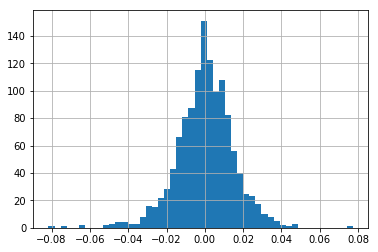

In [21]:
ford["returns"].hist(bins=50 )

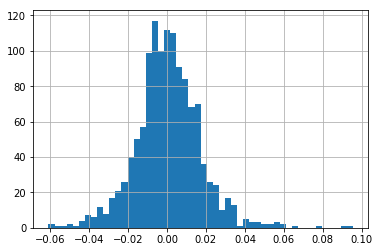

In [22]:
gm["returns"].hist(bins=50 )

** Stack the company returns on top of each other to find out which stock is the most "volatile"**

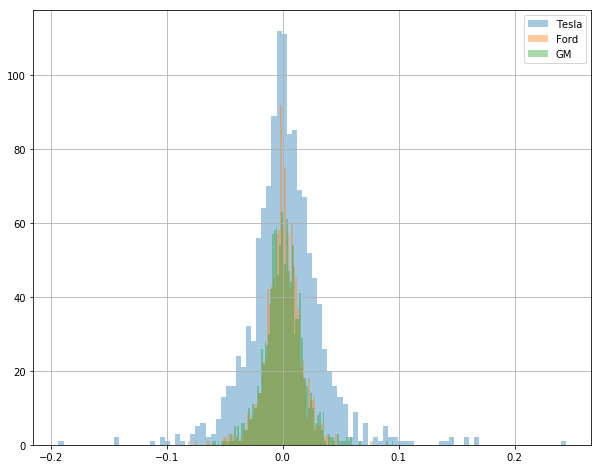

In [23]:
tesla["returns"].hist(bins=100, label="Tesla", figsize=(10,8), alpha=0.4)
ford["returns"].hist(bins=100, label="Ford", figsize=(10,8), alpha=0.4 )
gm["returns"].hist(bins=100, label="GM", figsize=(10,8), alpha=0.4)
plt.legend()

** Plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

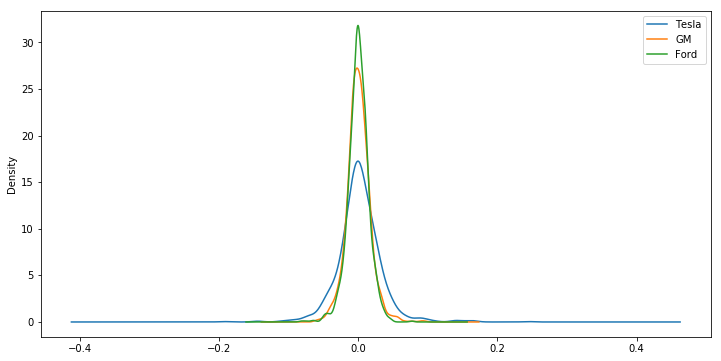

In [24]:
tesla["returns"].plot(kind="kde", label="Tesla", figsize=(12,6))
gm["returns"].plot(kind="kde", label="GM", figsize=(12,6))
ford["returns"].plot(kind="kde", label="Ford", figsize=(12,6))
plt.legend()

** Creating some box plots comparing the returns. **

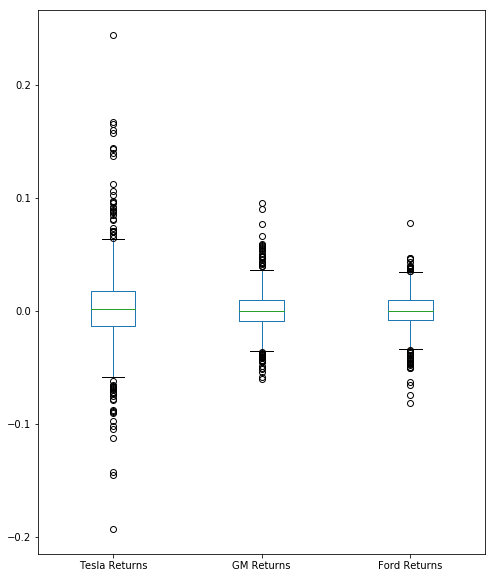

In [25]:
df = pd.concat([tesla["returns"], gm["returns"], ford["returns"]], axis=1)
df.columns = ["Tesla Returns", "GM Returns", "Ford Returns"]
df.plot(kind="box", figsize=(8,10))

Comparing Daily Returns between Stocks
** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

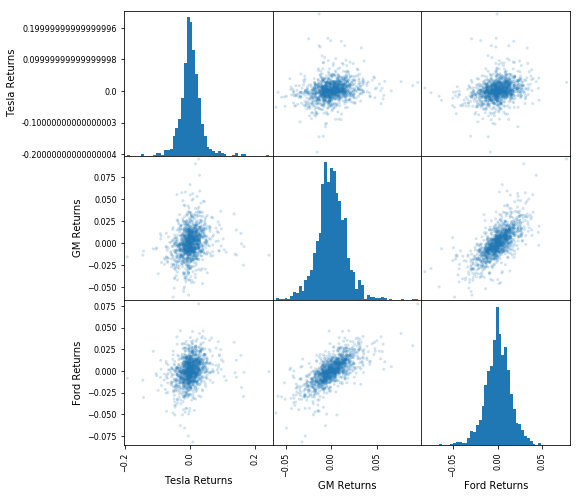

In [26]:
scatter_matrix(df, alpha=0.2, figsize=(8,8), diagonal='hist', hist_kwds={"bins":50});

** It looks like Ford and GM do have some sort of possible relationship, plot just these two against eachother in scatter plot to view this more closely!**

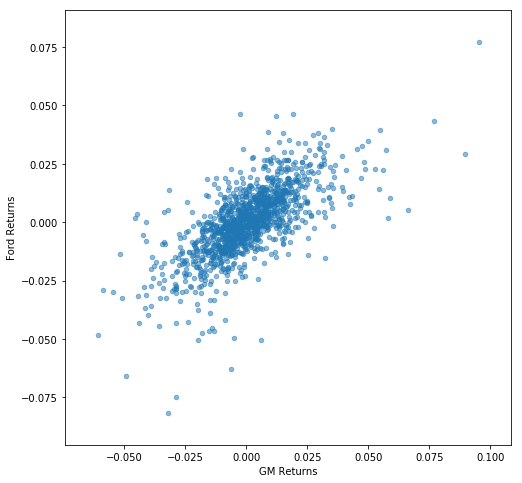

In [27]:
df.plot(kind="scatter", x="GM Returns", y="Ford Returns", alpha=0.5, figsize=(8,8))

Cumulative Daily Returns

Calculate daily cumulative returns. The formula for a cumulative daily return is:

i_i=(1+r_t)∗i_t−1

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

** Create a cumulative daily return column for each car company's dataframe.**

In [28]:
tesla["cumulative daily ret"] = (1+tesla["returns"]).cumprod()
ford["cumulative daily ret"] = (1+ford["returns"]).cumprod()
gm["cumulative daily ret"] = (1+gm["returns"]).cumprod()
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,cumulative daily ret
Date,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,0.986823
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,0.965812
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,0.958333
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.970442


** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

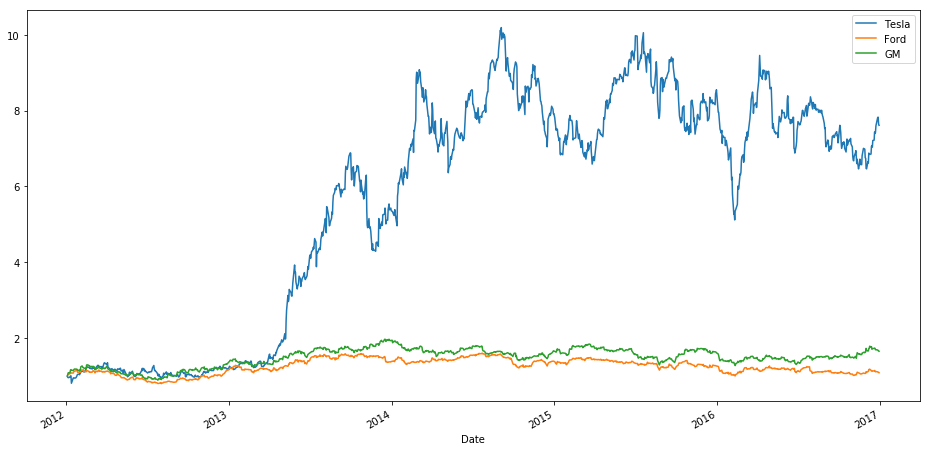

In [29]:
tesla["cumulative daily ret"].plot(figsize=(16,8), label="Tesla")
ford["cumulative daily ret"].plot(figsize=(16,8), label="Ford")
gm["cumulative daily ret"].plot(figsize=(16,8), label="GM")
plt.legend()

** conclusion: Tesla showed the highest return for a $1 invested.  Ford showed the lowest return**